This involves creating plots that help understand how single variables (univariate) or pairs of variables (bivariate) are distributed. `Seaborn` offers several functions for this, including histograms, kernel density estimates (KDE), empirical cumulative distribution functions (ECDF), and rug plots.


## Seaborn: Visualizing Distributions

This document covers:

* **Univariate Distributions:** Using axes-level functions `sns.histplot`, `sns.kdeplot`, `sns.ecdfplot`, `sns.rugplot` and the figure-level function `sns.displot` to visualize the distribution of single variables.
* **Bivariate Distributions:** Using `sns.histplot` and `sns.kdeplot` with both `x` and `y` arguments to visualize the joint distribution of two variables, including the use of `hue` for comparison.

---

These plots are fundamental for understanding the characteristics of your variables before further analysis.

In [2]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Load the 'penguins' dataset (good for distributions)
penguins_df = sns.load_dataset("penguins")

# --- Basic Inspection & Cleanup ---
print("--- 'penguins' Dataset Info ---")
penguins_df.info()
print("\n--- First 5 rows ---")
print(penguins_df.head())
# Drop rows with missing values for simplicity in plotting examples
penguins_df = penguins_df.dropna()
print("\n--- Info after dropping NaNs ---")
penguins_df.info()
print("-" * 30)

# Set a consistent theme
sns.set_theme(style="whitegrid")

--- 'penguins' Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

--- First 5 rows ---
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN          

#### 1. Univariate Distributions 

--- 1. Univariate Distributions ---
Generating Histogram (histplot)...


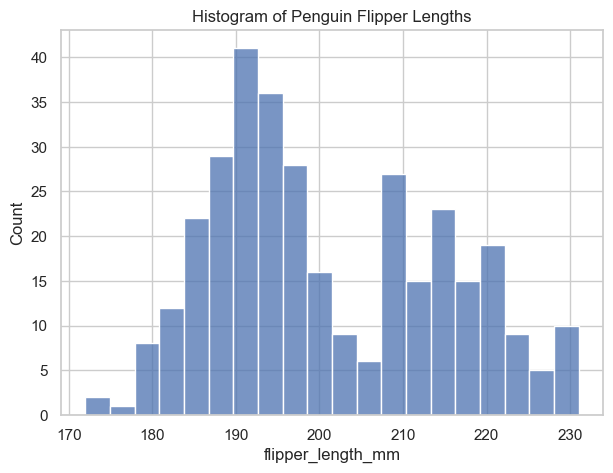

In [6]:
print("--- 1. Univariate Distributions ---")

# a) Histogram (sns.histplot - Axes-level)
# Shows counts of observations within discrete bins.
print("Generating Histogram (histplot)...")
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(data=penguins_df, x="flipper_length_mm", bins=20, ax=ax)
ax.set_title('Histogram of Penguin Flipper Lengths')
plt.show()

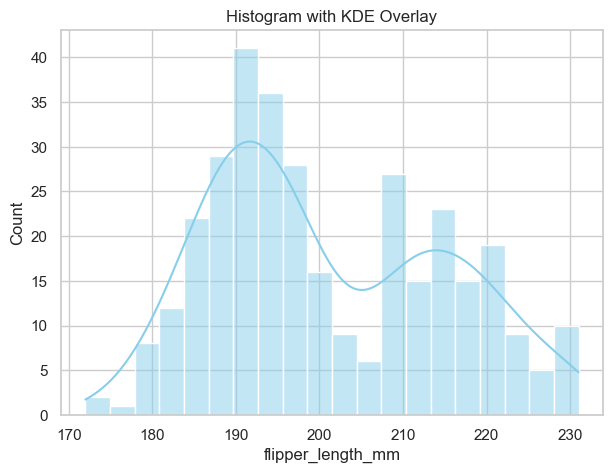

Generated Histograms.
--------------------


In [7]:
# Histogram with KDE curve overlaid
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(data=penguins_df, x="flipper_length_mm", bins=20, kde=True, color='skyblue', ax=ax)
ax.set_title('Histogram with KDE Overlay')
plt.show()
print("Generated Histograms.")
print("-" * 20)

Generating KDE Plot (kdeplot)...


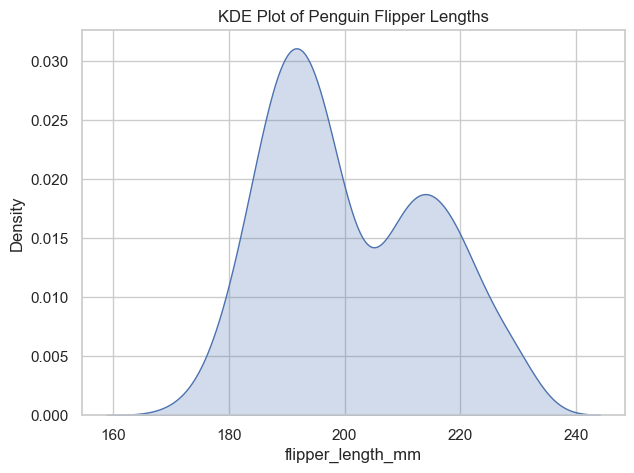

In [8]:
# b) Kernel Density Estimate (sns.kdeplot - Axes-level)
# Estimates a smooth probability density function.
print("Generating KDE Plot (kdeplot)...")
fig, ax = plt.subplots(figsize=(7, 5))
sns.kdeplot(data=penguins_df, x="flipper_length_mm", fill=True, ax=ax) # fill=True shades the area
ax.set_title('KDE Plot of Penguin Flipper Lengths')
plt.show()

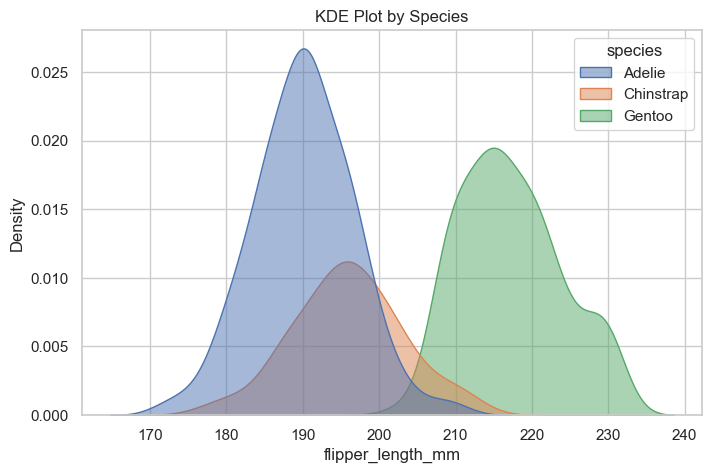

Generated KDE Plots.
--------------------


In [9]:
# Multiple KDEs using 'hue'
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(data=penguins_df, x="flipper_length_mm", hue="species", fill=True, alpha=0.5, ax=ax)
ax.set_title('KDE Plot by Species')
plt.show()
print("Generated KDE Plots.")
print("-" * 20)

Generating ECDF Plot (ecdfplot)...


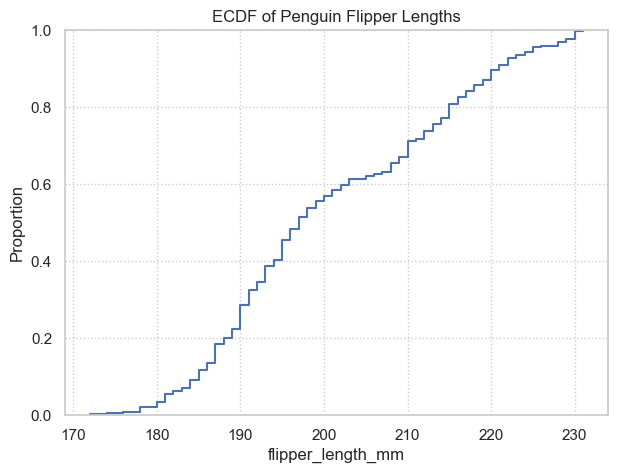

In [10]:
# c) Empirical Cumulative Distribution Function (sns.ecdfplot - Axes-level)
# Shows the proportion of data points below each value.
print("Generating ECDF Plot (ecdfplot)...")
fig, ax = plt.subplots(figsize=(7, 5))
sns.ecdfplot(data=penguins_df, x="flipper_length_mm", ax=ax)
ax.set_title('ECDF of Penguin Flipper Lengths')
ax.grid(True, linestyle=':')
plt.show()

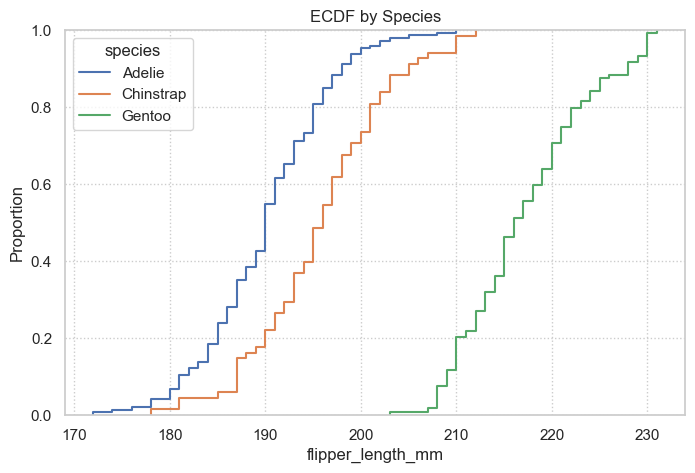

Generated ECDF Plots.
--------------------


In [11]:
# ECDF separated by species
fig, ax = plt.subplots(figsize=(8, 5))
sns.ecdfplot(data=penguins_df, x="flipper_length_mm", hue="species", ax=ax)
ax.set_title('ECDF by Species')
ax.grid(True, linestyle=':')
plt.show()
print("Generated ECDF Plots.")
print("-" * 20)

Generating Rug Plot (rugplot)...


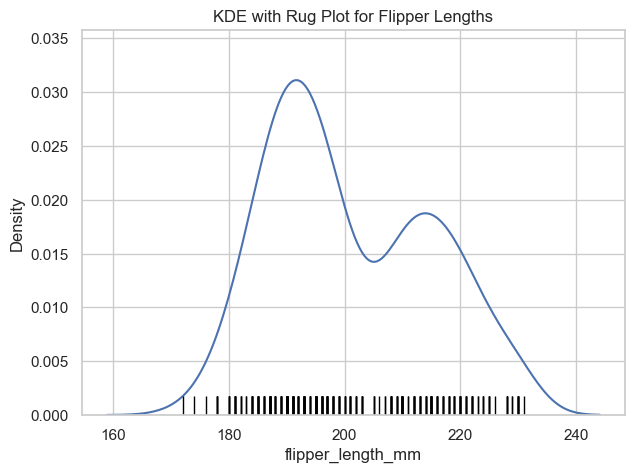

Generated Rug Plot.
--------------------


In [12]:
# d) Rug Plot (sns.rugplot - Axes-level)
# Draws small vertical ticks at each observation point along an axis.
# Often used to supplement other distribution plots.
print("Generating Rug Plot (rugplot)...")
fig, ax = plt.subplots(figsize=(7, 5))
sns.kdeplot(data=penguins_df, x="flipper_length_mm", ax=ax)
sns.rugplot(data=penguins_df, x="flipper_length_mm", height=0.05, color='black', ax=ax) # Add rug plot
ax.set_title('KDE with Rug Plot for Flipper Lengths')
plt.show()
print("Generated Rug Plot.")
print("-" * 20)

Generating Unified Distribution Plots (displot)...


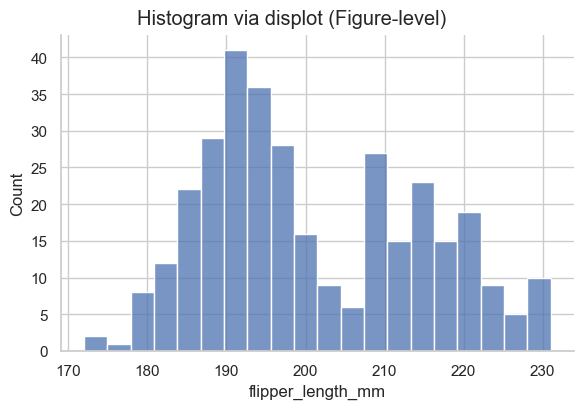

In [13]:
# e) Unified Distribution Plot (sns.displot - Figure-level)
# Combines histplot, kdeplot, ecdfplot with FacetGrid capabilities.
# Creates its own figure.
print("Generating Unified Distribution Plots (displot)...")
# Histogram using displot
sns.displot(data=penguins_df, x="flipper_length_mm", kind="hist", bins=20, height=4, aspect=1.5)
plt.suptitle('Histogram via displot (Figure-level)', y=1.02) # Use suptitle for figure-level
plt.show()

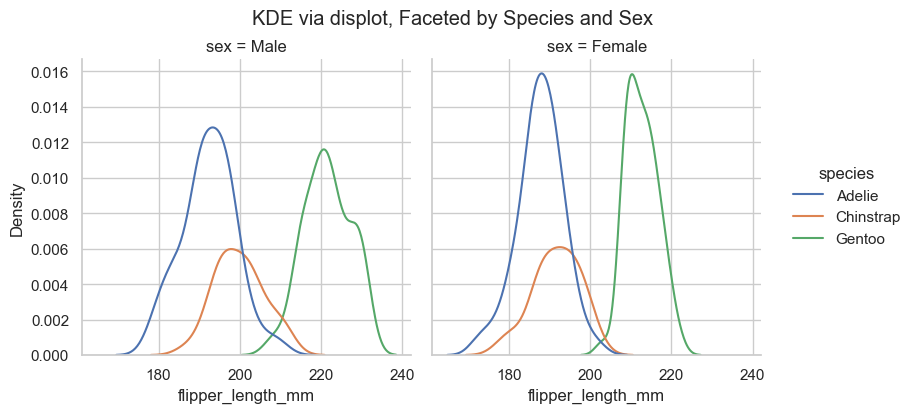

In [14]:
# KDE using displot, faceted by species
sns.displot(data=penguins_df, x="flipper_length_mm", kind="kde", hue="species", col="sex", height=4) # col creates separate plots
plt.suptitle('KDE via displot, Faceted by Species and Sex', y=1.03)
plt.show()

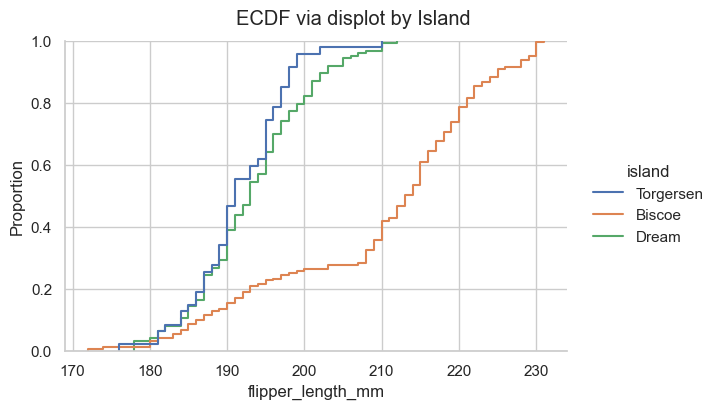

Generated plots using displot.
------------------------------


In [15]:
# ECDF using displot
sns.displot(data=penguins_df, x="flipper_length_mm", kind="ecdf", hue="island", height=4, aspect=1.5)
plt.suptitle('ECDF via displot by Island', y=1.02)
plt.show()
print("Generated plots using displot.")
print("-" * 30)

#### 2. Bivariate Distributions
- Visualize the joint distribution of two variables.

--- 2. Bivariate Distributions ---
Generating Bivariate Histogram...


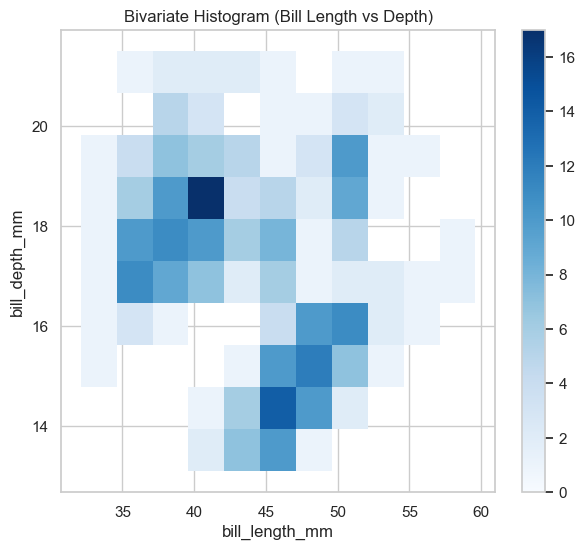

In [16]:
print("--- 2. Bivariate Distributions ---")

# a) Bivariate Histogram (sns.histplot)
print("Generating Bivariate Histogram...")
fig, ax = plt.subplots(figsize=(7, 6))
sns.histplot(data=penguins_df, x="bill_length_mm", y="bill_depth_mm", ax=ax, cbar=True, cmap="Blues")
# cbar=True adds a color bar for counts
ax.set_title('Bivariate Histogram (Bill Length vs Depth)')
plt.show()

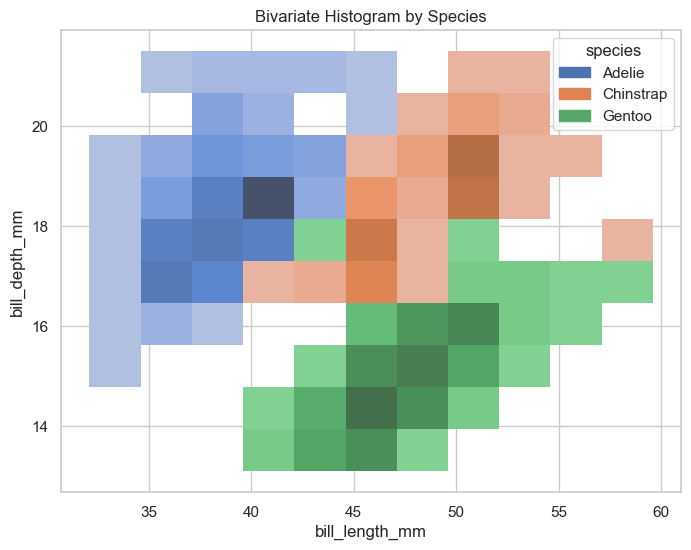

Generated Bivariate Histograms.
--------------------


In [17]:
# Bivariate histogram with hue
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=penguins_df, x="bill_length_mm", y="bill_depth_mm", hue="species", ax=ax, cmap="viridis")
ax.set_title('Bivariate Histogram by Species')
plt.show()
print("Generated Bivariate Histograms.")
print("-" * 20)

Generating Bivariate KDE Plot...


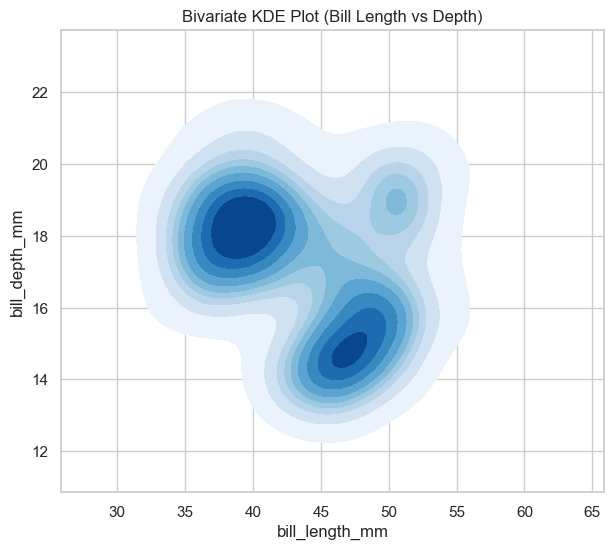

In [18]:
# b) Bivariate KDE Plot (sns.kdeplot)
print("Generating Bivariate KDE Plot...")
fig, ax = plt.subplots(figsize=(7, 6))
sns.kdeplot(data=penguins_df, x="bill_length_mm", y="bill_depth_mm", ax=ax, fill=True, cmap="Blues", thresh=0.05)
# fill=True shades areas, thresh controls level cutoff
ax.set_title('Bivariate KDE Plot (Bill Length vs Depth)')
plt.show()

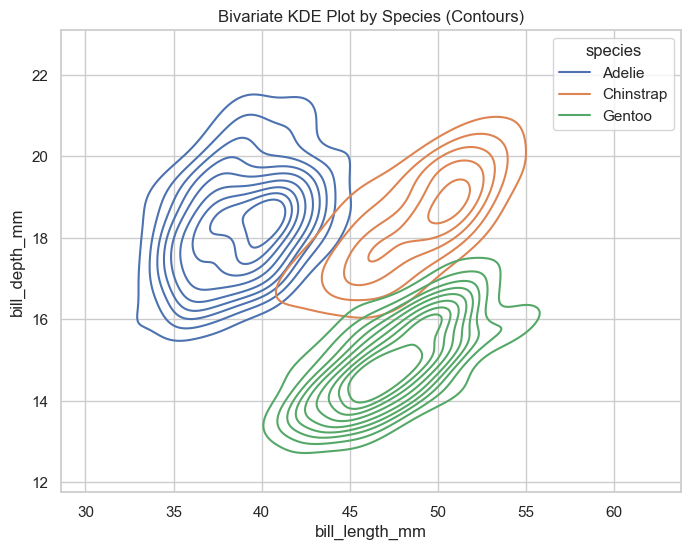

Generated Bivariate KDE Plots.
------------------------------


In [19]:
# Bivariate KDE with hue (contours)
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=penguins_df, x="bill_length_mm", y="bill_depth_mm", hue="species", ax=ax, thresh=0.1)
ax.set_title('Bivariate KDE Plot by Species (Contours)')
plt.show()
print("Generated Bivariate KDE Plots.")
print("-" * 30)

# Note: sns.jointplot() is another figure-level function specifically for
# bivariate distributions with marginal plots (covered later in Section VII).